We will build a regression model to predict the chances of admission into a particular university based on the students profile. 
Input - 7
Output - 1
GRE SCORE OUT OF 340
TOEFL SCORE OUT OF 120
RESEARCH EXPERIENCE (0 or 1)

In [271]:
import pandas as pd #dataframe manipulations
import numpy as np #numerical analysis
import seaborn as sns #data visualization
import matplotlib.pyplot as plt

In [272]:
# read the csv file 
admission_df= pd.read_csv("Admission_Predict.csv")

In [273]:
admission_df.head() #regression based problem

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [274]:
# Let's drop the serial no.
admission_df.drop("Serial No.",axis=1, inplace=True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


PERFORM EXPLORATORY DATA ANALYSIS

In [275]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [276]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [277]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [278]:
# Grouping by University ranking 
df_university=admission_df.groupby(by="University Rating").mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


PERFORM DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22c1358400>,
      dtype=object)

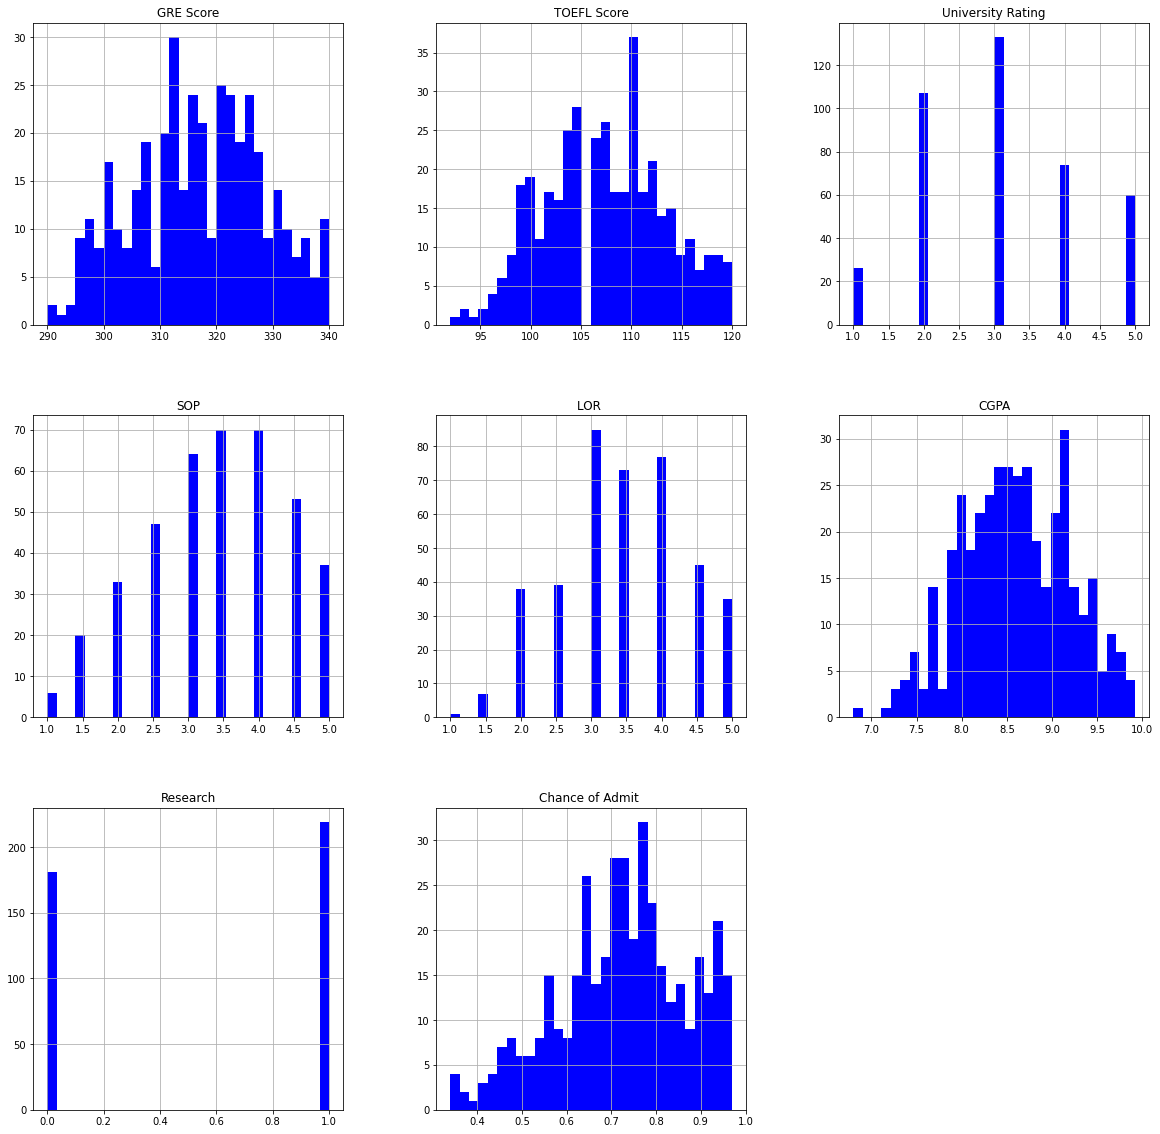

In [279]:
admission_df.hist(bins=30,figsize=(20,20),color='blue')

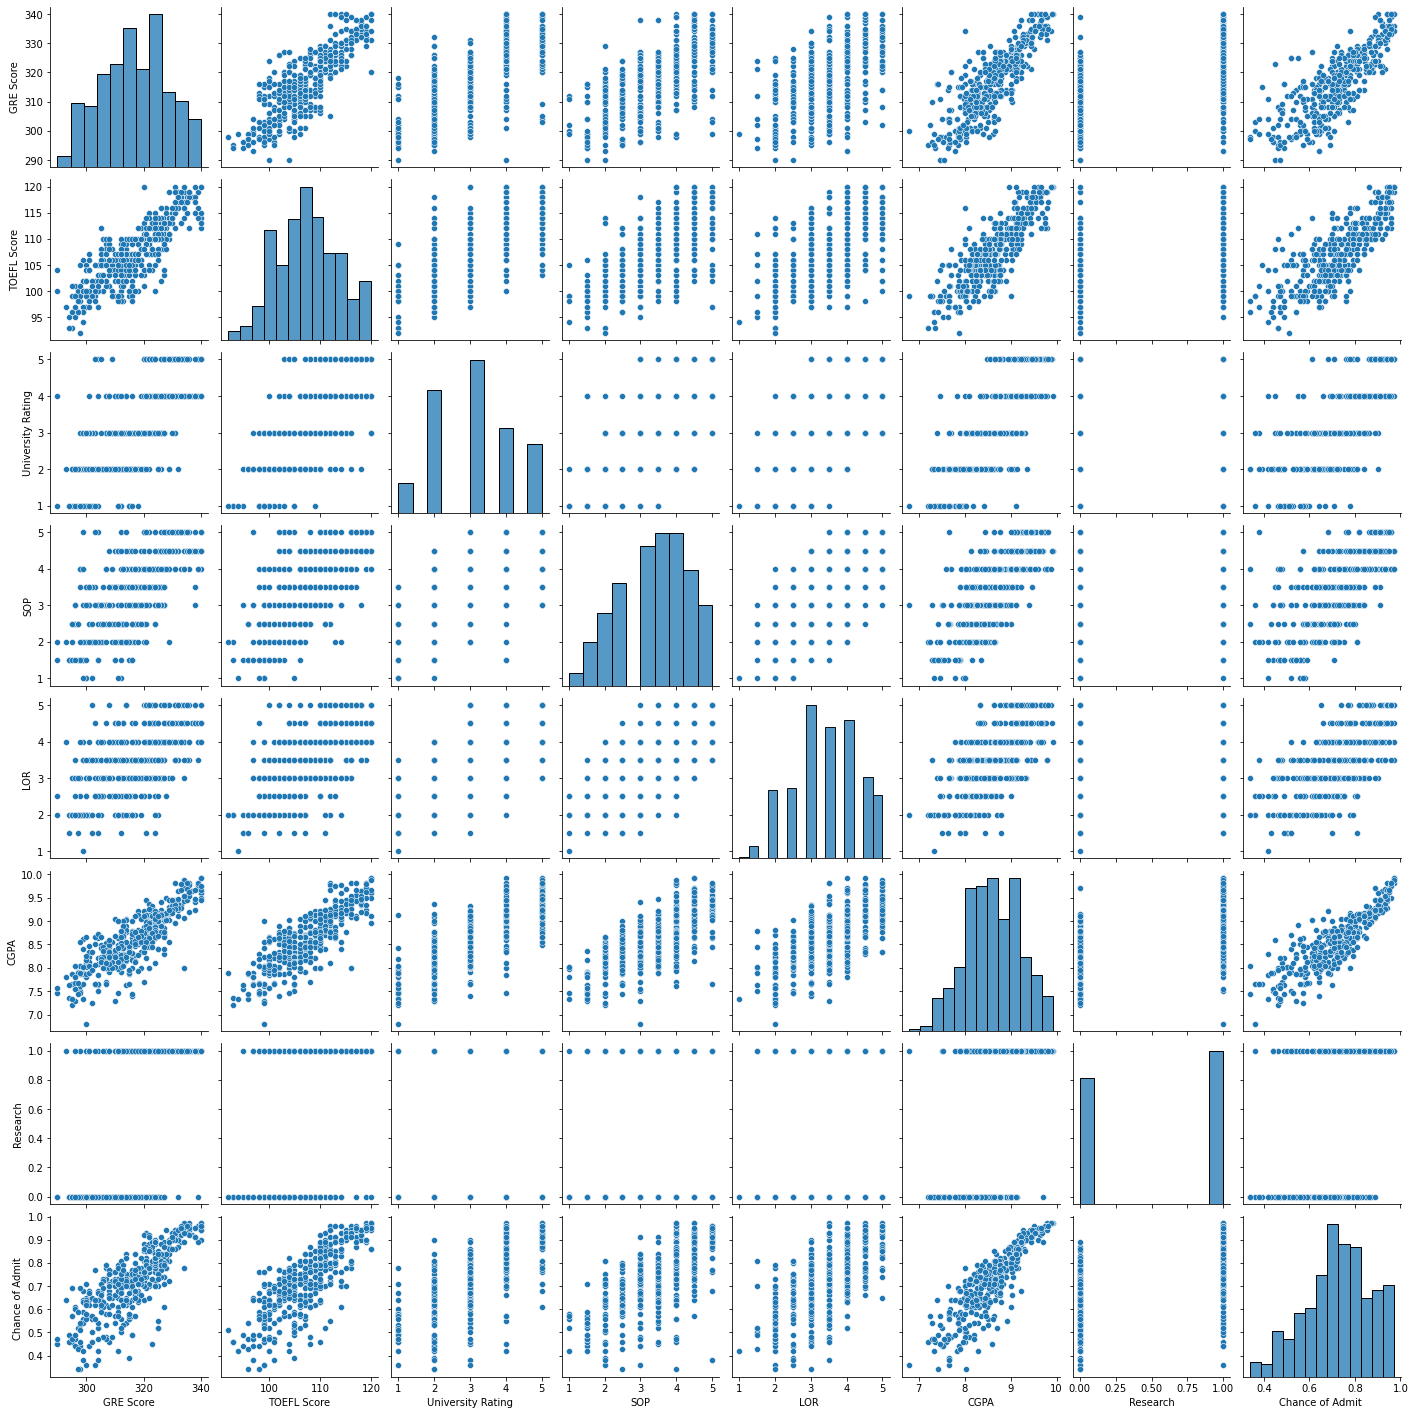

In [280]:
sns.pairplot(admission_df)

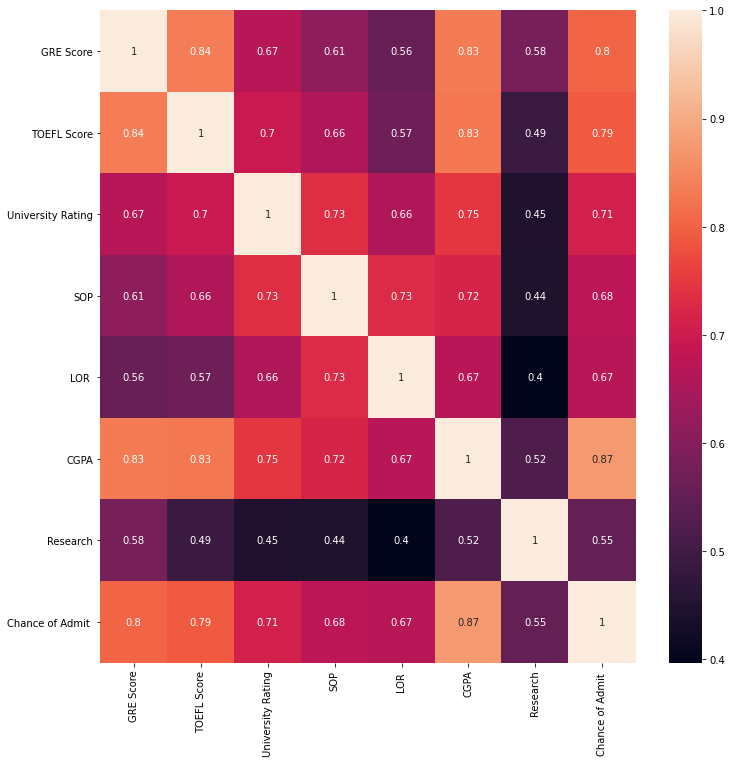

In [281]:
corr_matrix=admission_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True)
  

In [282]:
def outlier(data):
    out1=[]
    for col in data.columns:
        outliers =[]
        mean = data[col].mean()
        std = data[col].std()
        for i in data[col]:
                z = (i - mean)/std
                if z>2:
                    outliers.append(i)
        out1.append(list(outliers))
        print("There are {} outliers in {} feature".format(len(outliers),col))
    return out1
out = outlier(admission_df)

There are 8 outliers in GRE Score feature
There are 8 outliers in TOEFL Score feature
There are 0 outliers in University Rating feature
There are 0 outliers in SOP feature
There are 0 outliers in LOR  feature
There are 7 outliers in CGPA feature
There are 0 outliers in Research feature
There are 0 outliers in Chance of Admit  feature


**Does research paper really having a good impact in admission?**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


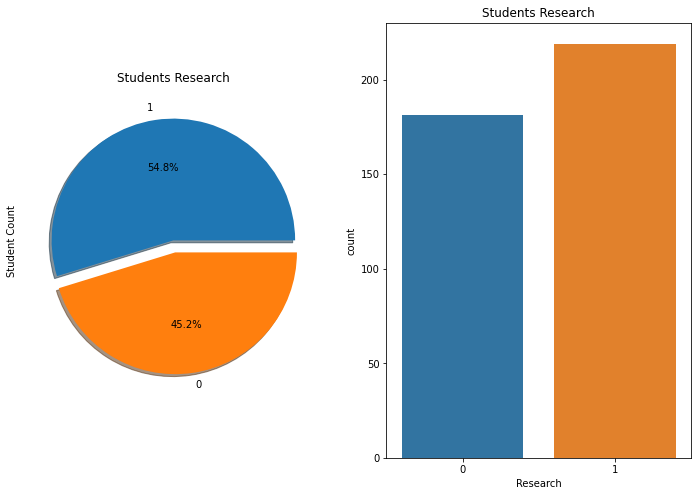

In [315]:
f,ax=plt.subplots(1,2,figsize=(12,8))
admission_df['Research'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Students Research')
ax[0].set_ylabel('Student Count')
sns.countplot('Research',data=admission_df,ax=ax[1])
ax[1].set_title('Students Research')
plt.show()

We can see that 55% Students have done Research.It possible only the better student could get a chance for doing research. Doing research does add practical knowledge and increases the student skill of working with groups or teams.

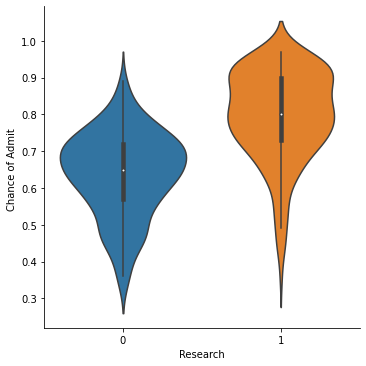

In [316]:
sns.catplot(x ='Research', y='Chance of Admit ',data=admission_df , kind="violin" )
plt.show()

 Yes, Chance of Admission increases if one does Research

## **3-D Visualization of CGPA, GRE Score and TOEFL Score**

In [318]:
import plotly.express as px
fig = px.scatter_3d(admission_df, x="CGPA", y="GRE Score", z="TOEFL Score", hover_name="Chance of Admit ")
fig.show()

**Who are the toppers in GRE, the students from top universities or normal universities?**

In [320]:
px.scatter(admission_df, x="TOEFL Score", y="GRE Score", color="University Rating", marginal_y="violin",
           marginal_x="box")

Conclusion: 
The top scorers in GRE and TOEFL are mostly from the University with Ratings more than 4

# **CREATE TRAINING AND TESTING DATASET**

In [283]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [284]:
X=admission_df.drop(columns=['Chance of Admit '])

In [285]:
y=admission_df['Chance of Admit ']

In [286]:
X.shape


(400, 7)

In [287]:
y.shape

(400,)

In [288]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [289]:
X=np.array(X)
y=np.array(y)

In [290]:
y=y.reshape(-1,1)
y.shape

(400, 1)

In [291]:
#scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x=StandardScaler()
X=scaler_x.fit_transform(X)
X

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [ ]:
scaler_y=StandardScaler()
y=scaler_y.fit_transform(y)
y

In [293]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.10,shuffle=False)

# **TRAIN AND EVALUATE A LINEAR REGRESSION MODEL**

In [294]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [295]:
LinearRegression_model= LinearRegression()
LinearRegression_model.fit(X_train,y_train)
accuracy_LinearRegression=LinearRegression_model.score(X_test,y_test)
accuracy_LinearRegression

0.863776206230827

**TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK**

In [296]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [297]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 50)                400       
_________________________________________________________________
activation_28 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 150)               7650      
_________________________________________________________________
activation_29 (Activation)   (None, 150)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 150)               22650     
_________________________________________________________________
activation_30 (Activation)   (None, 150)              

In [298]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [299]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 300, batch_size = 20, validation_split = 0.2)

Epoch 1/300
15/15 [==============================] - 0s 9ms/step - loss: 0.6396 - val_loss: 0.1608
Epoch 2/300
15/15 [==============================] - 0s 3ms/step - loss: 0.4014 - val_loss: 0.1386
Epoch 3/300
15/15 [==============================] - 0s 3ms/step - loss: 0.3414 - val_loss: 0.1360
Epoch 4/300
15/15 [==============================] - 0s 3ms/step - loss: 0.3247 - val_loss: 0.1409
Epoch 5/300
15/15 [==============================] - 0s 3ms/step - loss: 0.3145 - val_loss: 0.1333
Epoch 6/300
15/15 [==============================] - 0s 3ms/step - loss: 0.2866 - val_loss: 0.1331
Epoch 7/300
15/15 [==============================] - 0s 3ms/step - loss: 0.2749 - val_loss: 0.1434
Epoch 8/300
15/15 [==============================] - 0s 3ms/step - loss: 0.2599 - val_loss: 0.1478
Epoch 9/300
15/15 [==============================] - 0s 3ms/step - loss: 0.2697 - val_loss: 0.1459
Epoch 10/300
15/15 [==============================] - 0s 3ms/step - loss: 0.2736 - val_loss: 0.1617
Epoch 11/

In [300]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

2/2 [==============================] - 0s 2ms/step - loss: 0.2814
Accuracy : 0.7186105847358704


In [301]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

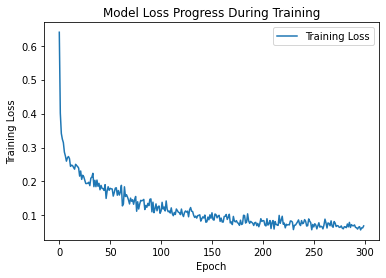

In [302]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# **TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS**

In [303]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm

from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [304]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.7406221647495594

In [305]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [306]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
RandomForest_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [307]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.8327374793510381

# **CALCULATE REGRESSION MODEL KPIs**

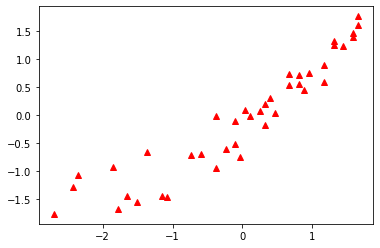

In [308]:
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, '^',color = 'r')

In [309]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

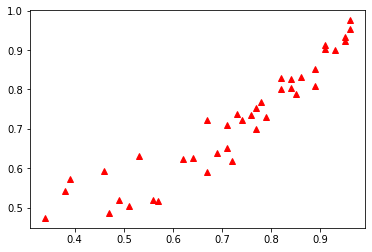

In [310]:
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')

In [311]:
k = X_test.shape[1]
n = len(X_test)
n

40

In [312]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.064 
MSE = 0.00408207369009993 
MAE = 0.04556621587077755 
R2 = 0.863776206230827 
Adjusted R2 = 0.8339772513438204


Something as simple as Linear Regression performs the best in this case, 
which proves that complicated models doesnt always mean better results. 
There are situations when simple models are much better suited